In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df_original = pd.read_csv('train.csv')

df = df_original.copy()

In [78]:
df

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


In [81]:
df.columns

Index(['house_id', 'date', 'location', 'type', 'block', 'street',
       'storey_range', 'area_sqm', 'flat_model', 'commence_date', 'price'],
      dtype='object')

In [91]:
room_order = sorted(df['type'].unique())
room_order

['1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI-GENERATION']

<Axes: xlabel='area_sqm', ylabel='Count'>

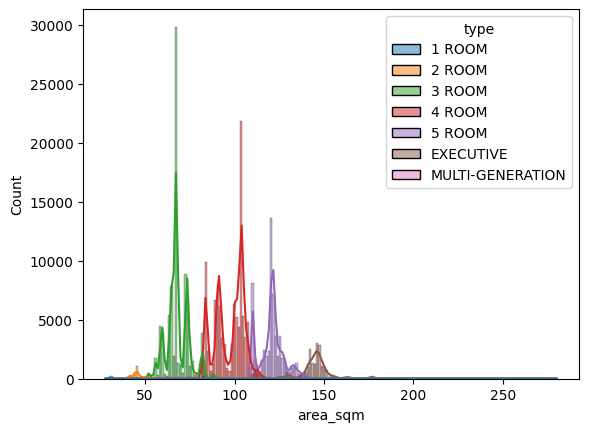

In [92]:
sns.histplot(x='area_sqm', data=df, hue='type', hue_order=room_order, kde=True)

<Axes: xlabel='area_sqm', ylabel='Count'>

/Users/jean/.pyenv/versions/3.9.18/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/jean/.pyenv/versions/3.9.18/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


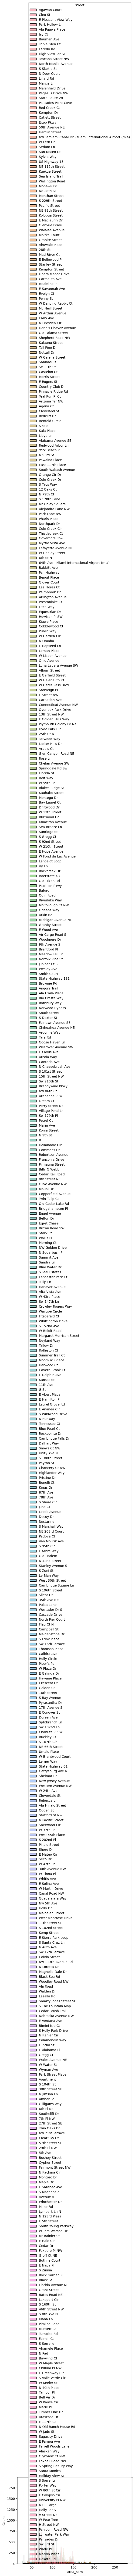

In [94]:
sns.histplot(x='area_sqm', data=df, hue='street')

<Axes: xlabel='commence_date', ylabel='Count'>

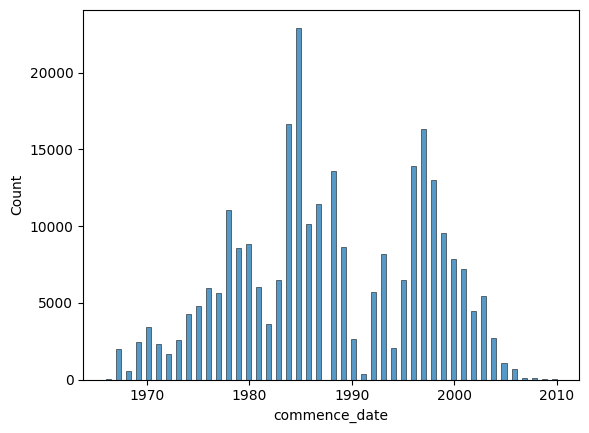

In [ ]:
sns.histplot(x='commence_date', data=df) #쌍봉데이터

<Axes: xlabel='type', ylabel='Count'>

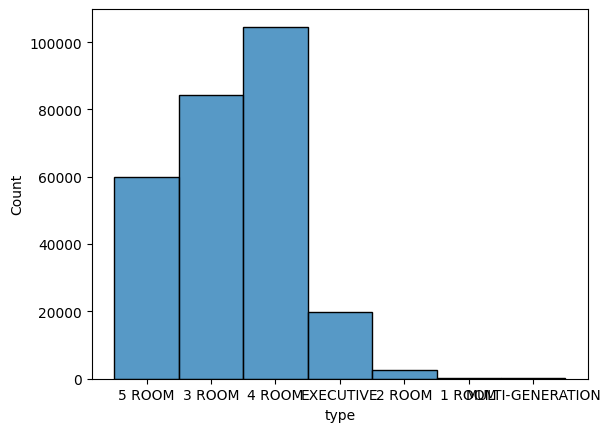

In [ ]:
sns.histplot(x='type', data=df)

<Axes: xlabel='area_sqm', ylabel='price'>

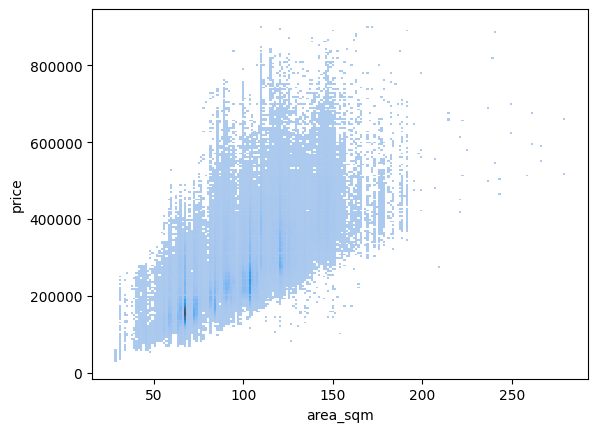

In [ ]:
sns.histplot(x='area_sqm',y='price', data=df)

<Axes: xlabel='commence_date', ylabel='price'>

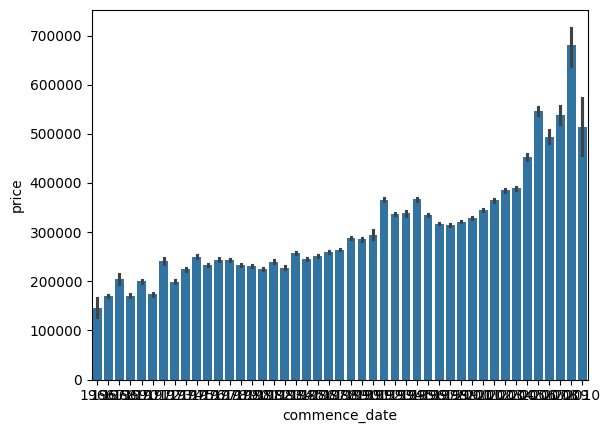

In [ ]:
sns.barplot(x='commence_date', y='price', data=df)

<Axes: xlabel='type', ylabel='price'>

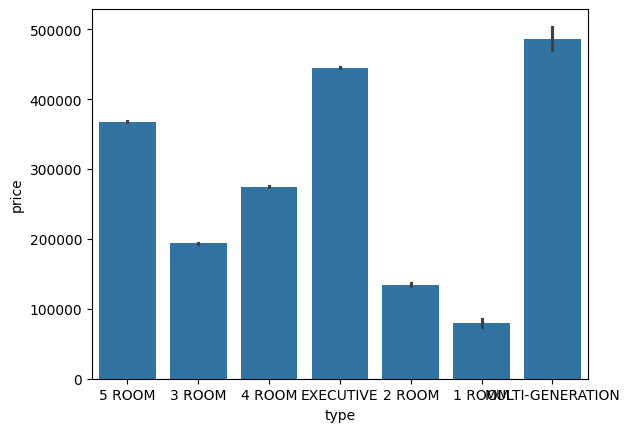

In [ ]:
sns.barplot(x='type', y='price', data=df)

<Axes: xlabel='location', ylabel='price'>

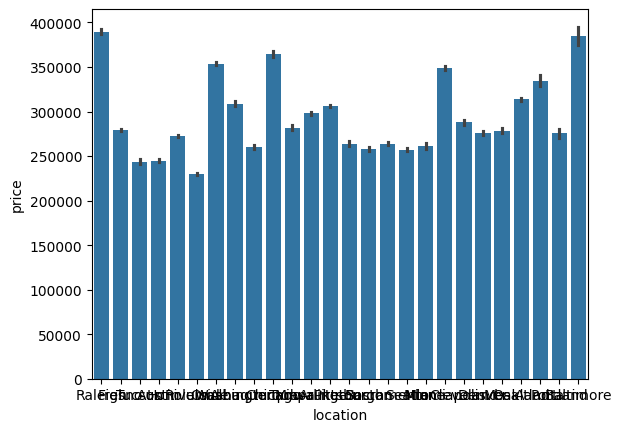

In [ ]:
sns.barplot(x='location', y='price', data=df)

<Axes: xlabel='block', ylabel='price'>

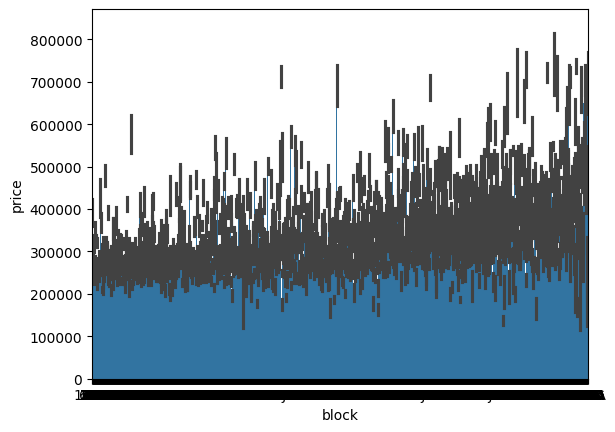

In [ ]:
sns.barplot(x='block', y='price', data=df)

<Axes: xlabel='flat_model', ylabel='price'>

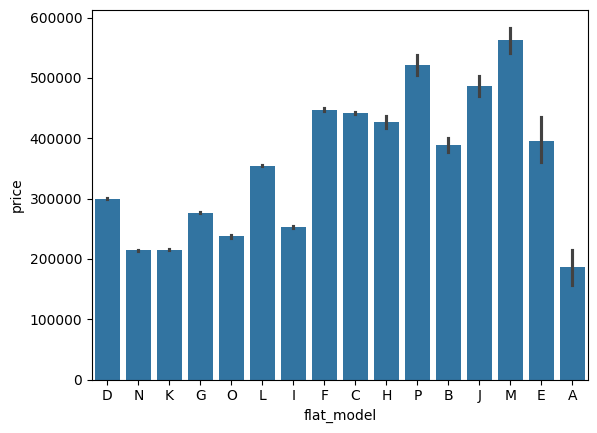

In [ ]:
sns.barplot(x='flat_model', y='price', data=df)

<Axes: xlabel='storey_range', ylabel='price'>

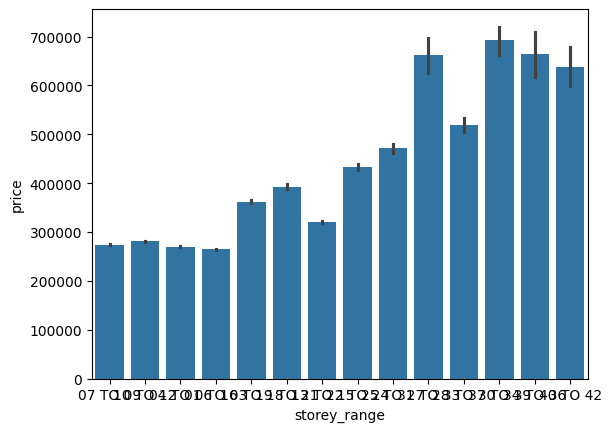

In [ ]:
sns.barplot(x='storey_range', y='price', data=df)

In [ ]:
from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import mutual_info_classif


In [ ]:
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


In [ ]:
categorical_columns = ['location', 'type', 'block', 'street', 'storey_range', 'flat_model']


In [ ]:
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))), 
                                index=categorical_columns, columns=categorical_columns)

In [ ]:
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_value = cramers_v(df[col1], df[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v_value



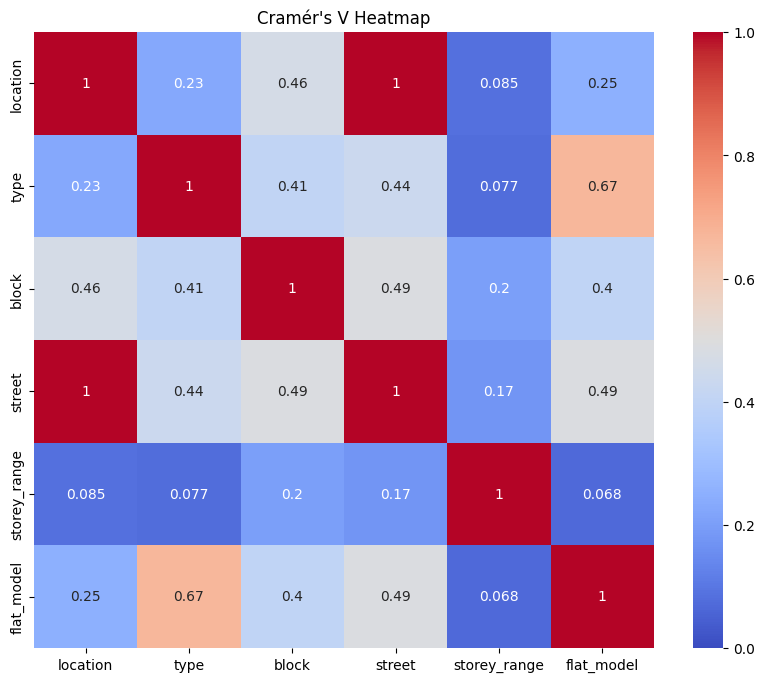

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()

In [ ]:
anova_results = {}

In [ ]:
for col in categorical_columns:
    groups = [df['price'][df[col] == category] for category in df[col].unique()]
    anova_result = f_oneway(*groups)
    anova_results[col] = anova_result.statistic
    print(f"ANOVA F-statistic for {col} and Price: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA F-statistic for location and Price: 1149.728317493987, p-value: 0.0
ANOVA F-statistic for type and Price: 45101.67444932595, p-value: 0.0
ANOVA F-statistic for block and Price: 27.778508464597355, p-value: 0.0
ANOVA F-statistic for street and Price: 243.7040307325712, p-value: 0.0
ANOVA F-statistic for storey_range and Price: 1548.4197043445913, p-value: 0.0
ANOVA F-statistic for flat_model and Price: 7066.347687982916, p-value: 0.0


In [ ]:
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic'])


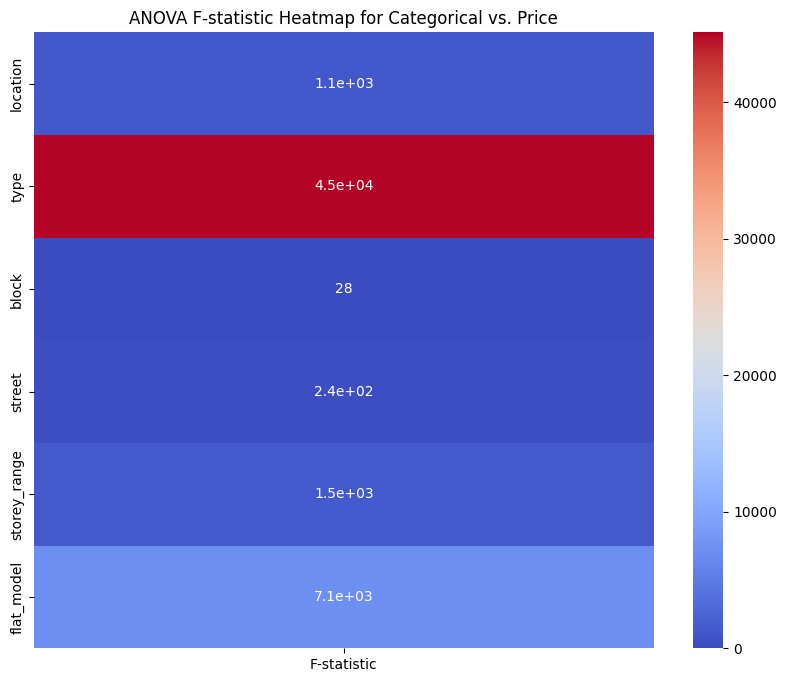

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(anova_df, annot=True, cmap='coolwarm', vmin=0)
plt.title("ANOVA F-statistic Heatmap for Categorical vs. Price")
plt.show()

In [ ]:
df.columns

Index(['house_id', 'date', 'location', 'type', 'block', 'street',
       'storey_range', 'area_sqm', 'flat_model', 'commence_date', 'price'],
      dtype='object')

In [ ]:
sorted_storey_range = sorted(df['storey_range'].unique())


In [ ]:
df['storey_range'] = pd.Categorical(df['storey_range'], categories=sorted_storey_range, ordered=True)


In [ ]:
sns.histplot(x='location', data=df, hue='storey_range' kde=True)

SyntaxError: invalid syntax (498210594.py, line 1)

<Axes: xlabel='location', ylabel='Count'>

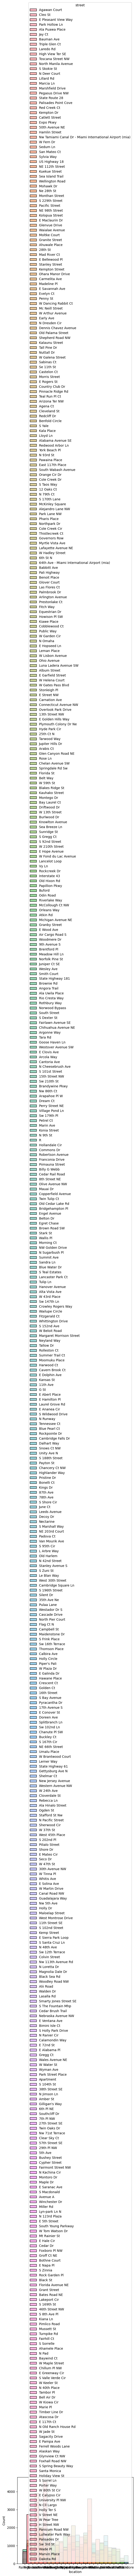

In [ ]:
sns.histplot(x='location', data=df, hue='street')

In [ ]:
sns.jointplot(x='')

In [ ]:
df['location'].value_counts()

location
Honolulu       26433
Arlington      22519
Sacramento     20769
Seatle         17793
Riverside      17595
Fresno         15546
Austin         14516
Milwaukee      12874
Boston         12783
Omaha          10234
Washington      9764
Denver          8984
Tampa           8856
Minneapolis     8583
Miami           8544
Tucson          7876
Mesa            7699
Albuquerque     7643
Pittsburgh      7303
Cleveland       6735
Chicago         5968
Oakland         4902
Raleigh         3094
Atlanta         2159
Portland        1838
Baltimore        711
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='Count'>

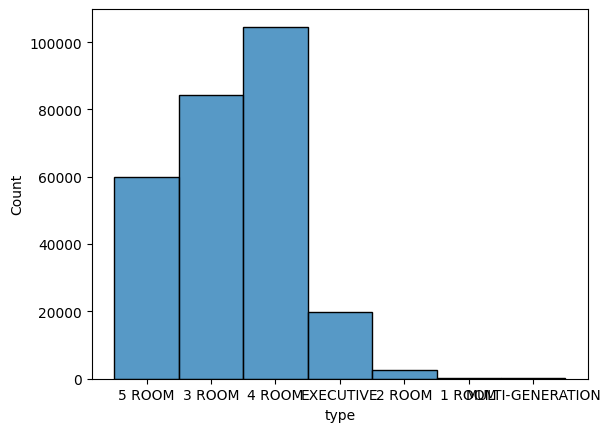

In [ ]:
sns.histplot(x='type', data=df)

In [ ]:
df['type'].value_counts()

type
4 ROOM              104589
3 ROOM               84422
5 ROOM               59817
EXECUTIVE            19903
2 ROOM                2602
1 ROOM                 265
MULTI-GENERATION       123
Name: count, dtype: int64

<Axes: xlabel='block', ylabel='Count'>

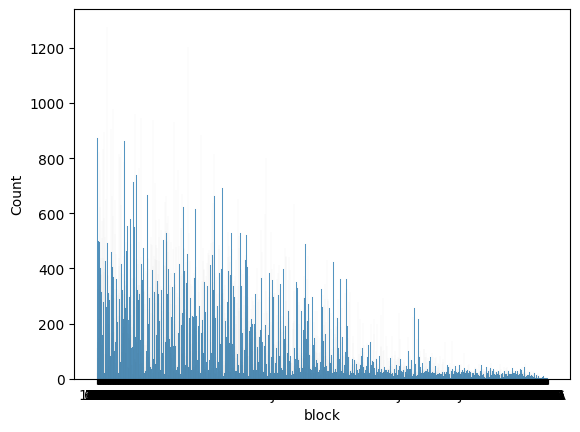

In [ ]:
sns.histplot(x='block', data=df)

In [ ]:
df['block'].value_counts()

block
2       1277
1       1204
4        977
3        962
114      946
        ... 
635B       1
632C       1
677A       1
221B       1
633A       1
Name: count, Length: 1984, dtype: int64

<Axes: xlabel='street', ylabel='Count'>

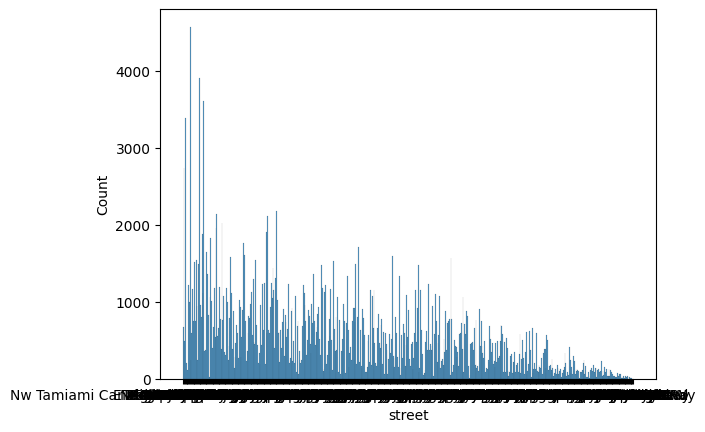

In [ ]:
sns.histplot(x='street', data=df)

In [ ]:
df['street'].value_counts()

street
Laredo Rd               4569
Palisades Point Cove    3903
50th Avenue NE          3608
Park Hollow Ln          3383
Cleo St                 2735
                        ... 
Holly Ter S                3
Wade Pl                    3
Lullwater Park Way         1
Marvin Place               1
Dakota Rd                  1
Name: count, Length: 522, dtype: int64

In [ ]:
df['storey_range'].value_counts()

storey_range
04 TO 06    69763
07 TO 09    62342
01 TO 03    56559
10 TO 12    52243
13 TO 15    18037
16 TO 18     6722
19 TO 21     3045
22 TO 24     1844
25 TO 27      789
28 TO 30      311
31 TO 33       24
34 TO 36       18
37 TO 39       16
40 TO 42        8
Name: count, dtype: int64

<Axes: xlabel='storey_range', ylabel='Count'>

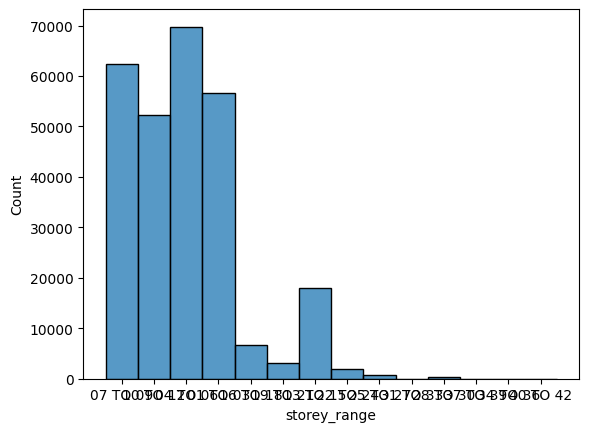

In [ ]:
sns.histplot(x='storey_range', data=df)

In [95]:
df['flat_model'].unique()

array(['D', 'N', 'K', 'G', 'O', 'L', 'I', 'F', 'C', 'H', 'P', 'B', 'J',
       'M', 'E', 'A'], dtype=object)